# Problem Statement:

Customer Segmentation is a popular application of unsupervised learning. Using clustering, identify segments of customers to target the potential user base. They divide customers into groups according to common characteristics like gender, age, interests, and spending habits so they can market to each group effectively.

Use K-means clustering and also visualize the gender and age distributions. Then analyze their annual incomes and spending scores.

# --------------------------------------------------------------------------------------------------

# Dataset used:
The dataset can be downloaded from: https://drive.google.com/file/d/19BOhwz52NUY3dg8XErVYglctpr5sjTy4/view

The information of various columns of the dataset are:-

1. CustomerID: It contains the ID of the customers, used for model building.
2. Gender: A categorical column. It has 2 categories, i.e., 'Male' and 'Female'.
3. Age: Numerical column, containing the age of the customers.
4. Annual Income (k$): Numerical column, containing annual income of a customer, in dollars.
5. Spending Score (1-100): Numerical column. This contains the score between 1-100 for a customer, known as spending score.

# -----------------------------------------------------------------------------------------------

# Importing Libraries used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline

In [3]:
df= pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)':'Spending Score'},inplace=True)

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [6]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
df.describe() # To obtain the descriptive analysis of the numerical columns in the dataset

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# -----------------------------------------------------------------------------------------

# Exploratory Data Analysis

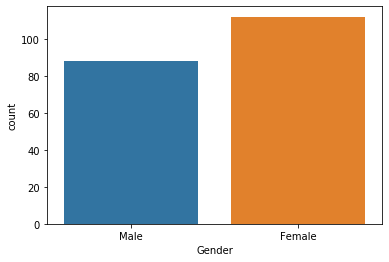

In [9]:
sns.countplot(df['Gender'])

From the above countplot, we can say that there are more female entries in the dataset when compared to male.

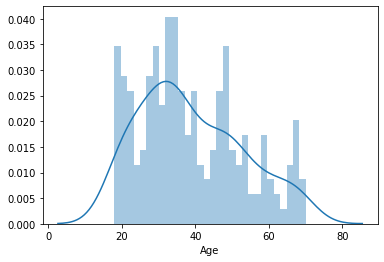

In [10]:
sns.distplot(df['Age'], bins=30)

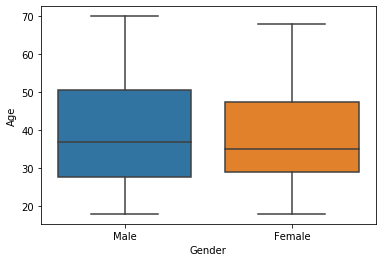

In [11]:
sns.boxplot(df['Gender'], df['Age'])

From the distplot and the descriptive analysis run on the dataset, it is visible that the age column contains values that are almost normally distributed. The kde on the distplot looks like a bell-curve.

From the boxplot we can see that the average age of females in the dataset is more than the male in the dataset. Also, there is no outlier present in the dataset

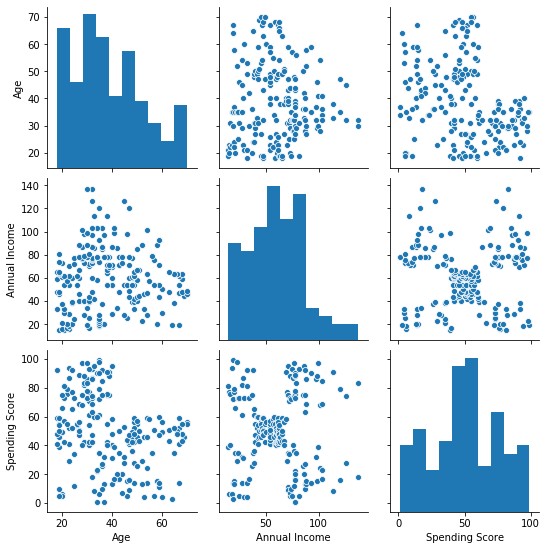

In [12]:
sns.pairplot(df)

In [13]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# -----------------------------------------------------------------------------------------------

# Treating the categorical feature:


In [14]:
gender= {'Male':0, 'Female':1}
df['Gender']= df['Gender'].map(gender)

In [15]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


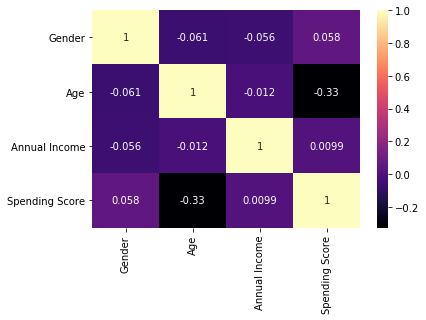

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='magma')

From the above heatmap, we can find that 'Age' is negatively correlated with the 'Annual Income' and 'Spending Score'. 

'Annual Income' is very very less correlated 'Spending Score'.

'Gender' is very less correlated with 'Spending Score' but more correlated, when compared to 'Annual Income'!

# ------------------------------------------------------------------------------------------------------

In [17]:
df.columns

Index(['Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [18]:
x= df['Annual Income'] # Feature
y= df['Spending Score'] #Label/ Target

In [19]:
df.drop('Spending Score', axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income
0,0,19,15
1,0,21,15
2,1,20,16
3,1,23,16
4,1,31,17


# Model training:
## Model used: KMeans

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

In [20]:
km= KMeans(n_clusters=2)

In [21]:
data=pd.DataFrame({'x1':df['Annual Income'],'x2':df['Gender'],'y': y})

In [22]:
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
yp=km.predict(data)

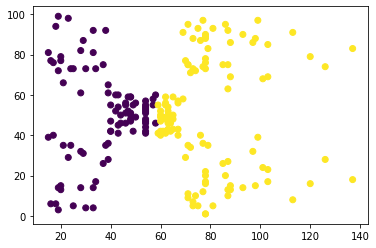

In [24]:
plt.scatter(x,y,c=yp)

# ------------------------------------------------------------------------------------------

# Finding correct number of clusters according to the given dataset by 'Elbow Method':

Text(0, 0.5, 'within Clusters Sum of Squares(WCSS)')

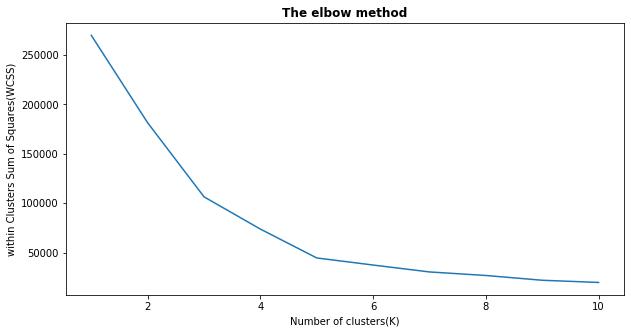

In [25]:
wcss=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method', fontweight="bold")
plt.xlabel('Number of clusters(K)')
plt.ylabel('within Clusters Sum of Squares(WCSS)') # Within cluster sum of squares

From the above graph, we can say that the best classification or clustering of data can be done into 5 groups. 

In [26]:
# Applying kmeans to the dataset / Creating the kmeans classifier
km= KMeans(n_clusters=5)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
yp=km.predict(data)

Text(0, 0.5, 'Spending Score')

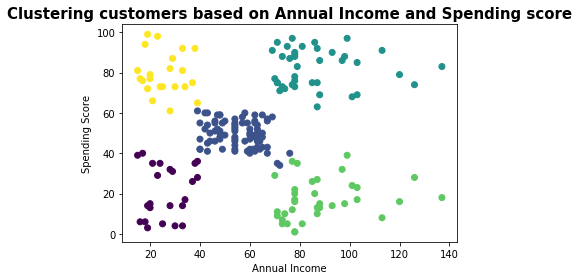

In [28]:
plt.scatter(data['x1'],data['y'],c=yp)
plt.title("Clustering customers based on Annual Income and Spending score", fontsize=15,fontweight="bold")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

On the basis of the above graph, we can say that the clusters represent the following groups:
1. HI----HS (High annual income, High Spending score)
2. LI----HS (Low annual income, High spending score)
3. HI----LS (High annual income, Low spending score)
4. LI----LS (Low annual income, Low spending score)
5. II----IS (Intermediate annual income, Intermediate spending score)
    
    where, S: spending and I: income and
           H: high, 
           L: low 
           I:intermediate